<table class="table table-bordered">
    <tr>
        <th style="width:250px;">
            <img src='./images/RISE_FFS_2_Light BG@4x.png' style="background-color:white; width: 100%; height: 100%; padding: 20px">
        </th>
        <th style="text-align:center;">
            <h1>Measures of Central Tendency, Asymmetry & Variability</h1>
            <h3>IBF TFIP</h3>
        </th>
    </tr>
</table>

<a id=contentpage></a>
### Objectives
After completing this practical exercise, you should be able to:
- [1: Measure Central Tendencies](#a)
    - [1.1 Apply measures to Income data set](#a1)
- [2: Measure Variability of datasets](#b)
    - [2.1 Measure variability in a sample](#b1)
- [3: Measure Asymmetry](#c)
    - [3.1 Measure skewness using Pearson's coefficient](#c1)
    - [3.2 Measure skewness using Fisher-Pearson's](#c2)
    - [3.3 Measure Kurtosis](#c3)
- [4: Measure Variability between two variables](#d)

## <a id="a"></a>
##  1. Measure Central Tendencies

In [1]:
import numpy as np
scores = [3,4,4,2,5]
mean_score = np.mean(scores)
print(mean_score)

3.6


In [2]:
median_score = np.median(scores)
print(median_score)

4.0


In [3]:
# You will need to import stats library
from scipy import stats
mode_score = stats.mode(scores)
print(mode_score)
# run the following code to show students how to obtain the value
print(mode_score[0])
print(mode_score[0][0])

# if data has no mode, the smallest value in array is returned, and count of 1
score2 = [3,4,2,5]
print(stats.mode(score2))

ModeResult(mode=array([4]), count=array([2]))
[4]
4
ModeResult(mode=array([2]), count=array([1]))


<a id="a1"></a>
#### 1.1 Applying measures of central tendency to income dataset

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv("./data/income dataset.csv")
data.head()

,age,workclass,Salary,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
0,39,Self-emp-not-inc,327120,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,Portugal
1,32,Private,123253,Assoc-acdm,12,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,42,United-States
2,47,Private,232628,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,Black,Male,0,0,40,United-States
3,19,Private,374262,12th,8,Never-married,Handlers-cleaners,Own-child,White,Male,0,0,20,United-States
4,46,Self-emp-not-inc,311231,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,40,United-States


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899 entries, 0 to 898
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              899 non-null    int64 
 1   workclass        899 non-null    object
 2   Salary           899 non-null    int64 
 3   education        899 non-null    object
 4   educational-num  899 non-null    int64 
 5   marital-status   899 non-null    object
 6   occupation       899 non-null    object
 7   relationship     899 non-null    object
 8   race             899 non-null    object
 9   gender           899 non-null    object
 10  capital-gain     899 non-null    int64 
 11  capital-loss     899 non-null    int64 
 12  hours-per-week   899 non-null    int64 
 13  native-country   899 non-null    object
dtypes: int64(6), object(8)
memory usage: 98.5+ KB


#### Q1: Find the Mean and Median for salary in the presence of outliers.

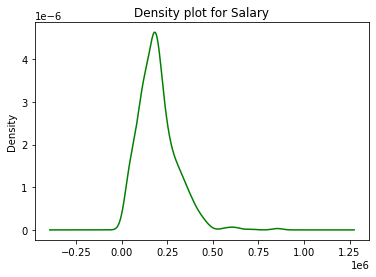

In [6]:
# density plot seems to show there is some outliers with high salary.
data.Salary.plot.density(color='green')
plt.title('Density plot for Salary')
plt.show()

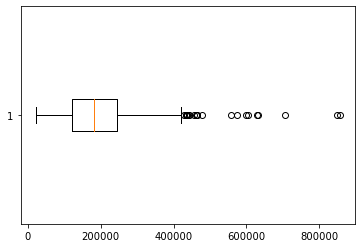

In [7]:
# box and whiskers diagram shows the outliers as dots
plt.boxplot(data['Salary'], vert = False)
 
# show plot
plt.show()

In [8]:
# find the median
median_sal = data.Salary.median()
print(f"Median: {median_sal}")
# alternative: np.median(data['Salary'])

Median: 181434.0


In [9]:
# find the mean
mean_sal = data.Salary.mean()
print(f"Mean: {mean_sal}")

Mean: 194150.01779755283


As there are some outliers, the mean salary would be higher. The median which is not affected by outliers (which corresponds to the orange line) shows a smaller value. Since income varies widely, mode is not useful here as there are simply too many unique values to find a meaningful mode. 

#### Q2: Find the education level that has the highest frequency

In [10]:
stats.mode(data.education)

# stats.mode(data.education)[0][0]

ModeResult(mode=array(['HS-grad'], dtype=object), count=array([302]))

In [11]:
# alternative method
data['education'].value_counts()

HS-grad         302
Some-college    198
Bachelors       142
Masters          61
11th             34
Assoc-acdm       33
Assoc-voc        33
10th             26
Prof-school      15
7th-8th          13
12th             12
Doctorate        10
9th              10
5th-6th           5
1st-4th           3
Preschool         2
Name: education, dtype: int64

[Back to top](#contentpage)

<a id="b"></a>
##  2. Measure Variability of two variables

In [12]:
# Quartiles and Range using boxplot
import pandas as pd
import matplotlib.pyplot as plt
runners = pd.read_csv("./data/runners.csv", index_col = 0) # col 0 as index
runners.head()

,Name,Age,Country,Sex,FinishingTime
1,"Desisa, Lelisa",25,ETH,M,129
2,"Tsegay, Yemane Adhane",30,ETH,M,129
3,"Chebet, Wilson",29,KEN,M,130
4,"Kipyego, Bernard",28,KEN,M,130
5,"Korir, Wesley",32,KEN,M,130


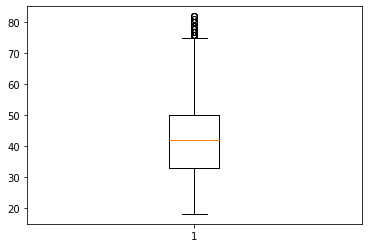

In [13]:
# The boxplot shows Q1, Q2 (Median), Q3, and Min and Max.
plt.boxplot(runners['Age'])
plt.show()

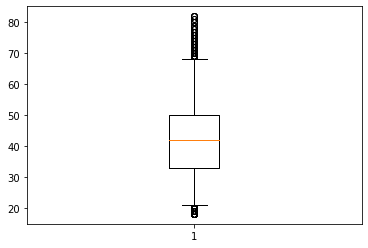

In [14]:
# Customize the whiskers to extend up to the 99th percentile and extend below to the 1th percentile
plt.boxplot(runners['Age'], whis= [1,99])
plt.show()

In [15]:
# Use describe to see the actual values of the min, max, median etc...
runners['Age'].describe()

count    26598.000000
mean        42.144823
std         11.294531
min         18.000000
25%         33.000000
50%         42.000000
75%         50.000000
max         82.000000
Name: Age, dtype: float64

In [16]:
# Calculate the population mean
pop_mean = np.mean(runners['Age'])
print(f"The mean is: {pop_mean:.3f}")

The mean is: 42.145


In [17]:
# Calculate the sample variance of the data
pop_var = np.var(runners['Age'])
print(f"The population variance is: {pop_var:.3f}")

The population variance is: 127.562


In [18]:
# calculate the standard deviation 
# Is the standard deviation same as the one listed in the describe function?
pop_std = np.std(runners['Age'])
print(f"The population standard deviation is: {pop_std:.3f}")

The population standard deviation is: 11.294


<a id="b1"></a>
### 2.1 Collecting a sample from the population 
Imagine we only had 1 hour to collect some data and we random interviewed 100 runners to get their age. Calculate the sample mean, sample variance and sample standard deviation.

In [19]:
# randomly sample 100 runners
rand_sample = runners.sample(n=100, random_state=1)

In [20]:
rand_sample.head()

,Name,Age,Country,Sex,FinishingTime
839,"Bilbrey, Eric",31,USA,M,169
22852,"Bunston, Stanley",68,CAN,M,269
24723,"Arsenault, Ryan",30,USA,M,296
7460,"Buitrago, Fredy J",41,USA,M,201
22885,"Hanrahan, Colleen",25,USA,F,269


In [21]:
samp_mean = np.mean(rand_sample['Age'])
samp_var = np.var(rand_sample['Age'], ddof = 1)
samp_sd = np.std(rand_sample['Age'], ddof = 1)

print(f"The sample mean is: {samp_mean:.3f}, whilst pop mean is: {pop_mean:.3f}")
print(f"The sample variance is: {samp_var:.3f}, whilst pop var is: {pop_var:.3f}")
print(f"The sample standard deviation is: {samp_sd:.3f}, whilst pop sd is: {pop_std:.3f}")

The sample mean is: 43.860, whilst pop mean is: 42.145
The sample variance is: 152.950, whilst pop var is: 127.562
The sample standard deviation is: 12.367, whilst pop sd is: 11.294


#### Q3: Is the standard deviation for Age similar for different gender of runners?

In [22]:
runners.groupby('Sex')['Age'].std(ddof = 0) 
# ddof = 1 is the default, which we use if data is a sample

Sex
F    10.470701
M    11.467935
Name: Age, dtype: float64

#### Q4: What is the mean and variance for the finishing time for males and females

In [23]:
ave_time = runners.groupby('Sex')['FinishingTime'].mean()
print(f"Mean finishing time (male): {ave_time[1]:.3f} mins")
print(f"Mean finishing time (female): {ave_time[0]:.3f} mins")

Mean finishing time (male): 216.100 mins
Mean finishing time (female): 237.868 mins


In [24]:
var_time = runners.groupby('Sex')['FinishingTime'].var(ddof = 0)
print(f"Variance for finishing time (male): {var_time[1]:.3f}")
print(f"Variance for finishing time (female): {var_time[0]:.3f}")

Variance for finishing time (male): 1661.785
Variance for finishing time (female): 1348.503


[Back to top](#contentpage)

<a id="c"></a>
##  3. Measure Asymmetry

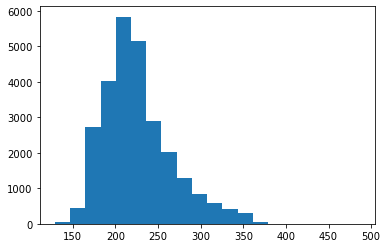

In [25]:
# Plot the age of the runners
plt.hist(runners['FinishingTime'], bins = 20)
plt.show()

Consider the distribution of finishing times of these runners.

In [26]:
# Calculate the mean and median age
mean = np.mean(runners['FinishingTime'])
median = np.median(runners['FinishingTime'])
mode = stats.mode(runners['FinishingTime'])[0][0]
print(f"Mean: {mean}, Median: {median}, Mode: {mode}")

Mean: 225.93503270922625, Median: 219.0, Mode: 208


In [27]:
# Standard deviation
sd = np.std(runners['FinishingTime'])
print(f"Standard deviation: {sd}")

Standard deviation: 40.467274877173466


<a id="c1"></a>
#### 3.1 Measure skewness using Pearson's coefficient

##### Q5: Calculate the skewness of this distribution using Pearson's coefficient.

In [28]:
# using pearson's coefficient of skewness (median)
skew = 3*(mean - median)/sd
print(skew)

0.5141215510761847


The calculation shows a positive skew in the finishing time of runners. Another way to determine the skew is to look at the mean, median and mode. Since the Mean > Median > Mode, the distribution is a positive skew.

<a id="c2"></a>
#### 3.2 Measure skewness using Fisher-Pearson's

##### Q6: Calculate the skewness using Fisher-Pearson's coefficient of skewness

#### Skewness example

In [29]:
x = [60,70,80,90,99,80,78,93,94,75]
stats.skew(x)

-0.25875748496977397

The data set above shows a slight negative skew.

<a id="c3"></a>
### 3.3 Measure Kurtosis

Kurtosis measures whether there are extreme values in either of the tails (or simply if the tails are heavy or light). It evaluates how thick or thin the tails of a given probability distribution in comparison to the normal distribution.

Skewness focuses on the differentiating distribution based on the extreme values, in either tails
<img src="https://i.stack.imgur.com/KBQLN.jpg" alt="Skewness" />
Positive excess kurtosis – when kurtosis is > 3, then the distribution has a sharp peak and is called a leptokurtic distribution.

Negative excess kurtosis – when kurtosis is < 3, then the distribution has a flat peak and is called a platykurtic distribution.

Zero excess kurtosis – when kurtosis= 3, then the distribution follows a normal distribution and is also called a mesokurtic distribution.

In [30]:
# measure kurtosis
from scipy.stats import kurtosis
x2 = [55, 78, 65, 98, 97, 60, 67, 65, 83, 65]
print(kurtosis(x2, fisher=False))

2.0453729382893178


Note: setting fisher = False in the above code does the calculation of the Pearson’s definition of kurtosis where the kurtosis value for normal distribution = 3.
Since the calculation obtained is < 3, this shows that we have a distribution with negative kurtosis, meaning the distribution has thicker tails and is flatter than the normal distribution.

[Back to top](#contentpage)

<a id="d"></a>
##  4. Measure Variability between data sets

#### Calculating Covariance

<AxesSubplot:xlabel='Age'>

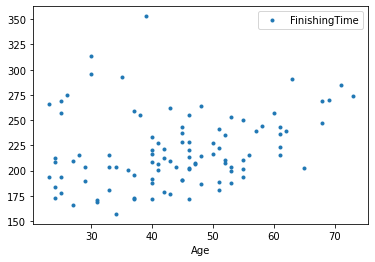

In [31]:
# Using the sample data, plot the scatter plot between the two variables age and finishing time

rand_sample.plot(x="Age", y = "FinishingTime", style=".")

In [32]:
# Calculate the covariance (sample)
covariance = np.cov(rand_sample['Age'], rand_sample['FinishingTime'], ddof = 1)
print(f"Covariance matrix:\n {covariance}")


Covariance matrix:
 [[ 152.94989899  108.21575758]
 [ 108.21575758 1289.91151515]]


In [33]:
print(f"Covariance:\n {covariance[0][1]:.3f}")

Covariance:
 108.216


It is hard for us to intepret the result other than the positive covariance denotes a direct relationship. As the age of the runner increases, the finishing time also increases. Is this relationship a strong one? Let's use correlation to find out...

#### Calculating Correlation
You can think of correlation as the normalized version of covariance.

In [34]:
corr = np.corrcoef(rand_sample['Age'], rand_sample['FinishingTime'])
print(f"Correlation matrix:\n {corr}")


Correlation matrix:
 [[1.         0.24363291]
 [0.24363291 1.        ]]


In [35]:
print(f"Correlation or age and finishing time:\n {corr[0][1]:.3f}")

Correlation or age and finishing time:
 0.244


There is some positive correlation between age and finishing time though it is not a very strong relationship! This means that age does not define your finishing time ;)

#### Calculating Coefficient of Variation
Coefficient of variation (CV) also known as relative standard deviation is a standardized measure of dispersion of a probability distribution.

In [36]:
# Load in data taken from kaggle (https://www.kaggle.com/datasets/evangower/big-tech-stock-prices)
amzn = pd.read_csv("./data/AMZN.csv")
googl = pd.read_csv("./data/GOOGL.csv")
meta = pd.read_csv("./data/META.csv")
amzn.info()
# observe the Dtype of Date

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3271 entries, 0 to 3270
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3271 non-null   object 
 1   Open       3271 non-null   float64
 2   High       3271 non-null   float64
 3   Low        3271 non-null   float64
 4   Close      3271 non-null   float64
 5   Adj Close  3271 non-null   float64
 6   Volume     3271 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 179.0+ KB


In [37]:
# convert to DateTime object
amzn['Date']= pd.to_datetime(amzn['Date'])
googl['Date']= pd.to_datetime(googl['Date'])
meta['Date']= pd.to_datetime(meta['Date'])
meta.info()

C:\Users\liu nelson\AppData\Local\Temp\ipykernel_17864\562546725.py:2: UserWarning: Parsing '13/01/2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  amzn['Date']= pd.to_datetime(amzn['Date'])
C:\Users\liu nelson\AppData\Local\Temp\ipykernel_17864\562546725.py:2: UserWarning: Parsing '14/01/2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  amzn['Date']= pd.to_datetime(amzn['Date'])
C:\Users\liu nelson\AppData\Local\Temp\ipykernel_17864\562546725.py:2: UserWarning: Parsing '15/01/2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  amzn['Date']= pd.to_datetime(amzn['Date'])
C:\Users\liu nelson\AppData\Local\Temp\ipykernel_17864\562546725.py:2: UserWarning: Parsing '19/01/2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  amzn['Date']= pd.to_datetime(amzn['Date'])
C:\U

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2688 entries, 0 to 2687
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2688 non-null   datetime64[ns]
 1   Open       2688 non-null   float64       
 2   High       2688 non-null   float64       
 3   Low        2688 non-null   float64       
 4   Close      2688 non-null   float64       
 5   Adj Close  2688 non-null   float64       
 6   Volume     2688 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 147.1 KB


C:\Users\liu nelson\AppData\Local\Temp\ipykernel_17864\562546725.py:2: UserWarning: Parsing '18/06/2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  amzn['Date']= pd.to_datetime(amzn['Date'])
C:\Users\liu nelson\AppData\Local\Temp\ipykernel_17864\562546725.py:2: UserWarning: Parsing '21/06/2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  amzn['Date']= pd.to_datetime(amzn['Date'])
C:\Users\liu nelson\AppData\Local\Temp\ipykernel_17864\562546725.py:2: UserWarning: Parsing '22/06/2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  amzn['Date']= pd.to_datetime(amzn['Date'])
C:\Users\liu nelson\AppData\Local\Temp\ipykernel_17864\562546725.py:2: UserWarning: Parsing '23/06/2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  amzn['Date']= pd.to_datetime(amzn['Date'])
C:\U

In [38]:
meta.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-05-18,42.049999,45.000000,38.000000,38.230000,38.230000,573576400
1,2012-05-21,36.529999,36.660000,33.000000,34.029999,34.029999,168192700
2,2012-05-22,32.610001,33.590000,30.940001,31.000000,31.000000,101786600
3,2012-05-23,31.370001,32.500000,31.360001,32.000000,32.000000,73600000
4,2012-05-24,32.950001,33.209999,31.770000,33.029999,33.029999,50237200


In [39]:
# Subset quarter two data for the year 2022 and closing price
amzn_q2 = amzn['Close'].loc[(amzn['Date']> '01/04/2022') & (amzn['Date']< '30/06/2022')]
googl_q2 = googl['Close'].loc[(googl['Date']> '01/04/2022') & (googl['Date']< '30/06/2022')]
meta_q2 = meta['Close'].loc[(meta['Date']> '01/04/2022') & (meta['Date']< '30/06/2022')]

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arraylike.py:48: UserWarning: Parsing '30/06/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return self._cmp_method(other, operator.lt)


In [40]:
amzn_q2.head()

3021    170.404495
3022    167.522003
3023    164.356995
3024    163.253998
3029    161.214005
Name: Close, dtype: float64

Since the stocks trade at different values, the coefficient of variation shows the extent of variability in relation to the mean.

In [41]:
# Amazon coefficient of variance for the closing price

amzn_mean = np.mean(amzn_q2)
amzn_var = np.var(amzn_q2, ddof = 1)
amzn_sd = np.std(amzn_q2, ddof = 1)
amzn_cv = amzn_sd/amzn_mean
print(f"Amazon mean: {amzn_mean} and sd: {amzn_sd}")
print(f"Coefficent of variation (Amazon): {amzn_cv}")

Amazon mean: 134.4191455726496 and sd: 23.14375854008057
Coefficent of variation (Amazon): 0.17217605752130039


In [42]:
# Google coefficient of variance for the closing price
googl_mean = np.mean(googl_q2)
googl_var = np.var(googl_q2, ddof = 1)
googl_sd = np.std(googl_q2, ddof = 1)
googl_cv = googl_sd/googl_mean
print(f"Google mean: {googl_mean} and sd: {googl_sd}")
print(f"Coefficent of variation (Google): {googl_cv}")

Google mean: 120.2456230471698 and sd: 14.383201483818052
Coefficent of variation (Google): 0.11961517699630388


In [43]:
# Meta coefficient of variance for the closing price

meta_mean = np.mean(meta_q2)
meta_var = np.var(meta_q2, ddof = 1)
meta_sd = np.std(meta_q2, ddof = 1)
meta_cv = meta_sd/meta_mean
print(f"Meta mean: {meta_mean} and sd: {meta_sd}")
print(f"Coefficent of variation (Meta): {meta_cv}")

Meta mean: 204.67017154700844 and sd: 56.21952105141519
Coefficent of variation (Meta): 0.27468350969991123


We can now compare both share prices using coefficient of variation (cv). The higher the CV, the greater the dispersion, which would mean that the price is less stable. Google appears to be the most stable of the three, for that time period. Meta appears to be the least stable with the highest coefficient of variation. 

Coefficient of variation can be useful in such cases. You could also use it to comparing the variation of prices of goods that are recorded in different currencies. 

[Back to top](#contentpage)